In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import scipy as scp
import seaborn as sns

import datetime 

# ----
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


# Cargar train

# Neural Network

## Select X and Y

In [26]:
X=train[train.columns[:-1]]
y=train[train.columns[-1]]


In [27]:
y = np.array(y)

In [28]:
y = np.reshape(y,(-1,1))

## Normalizar/Escalar  X

Primero se entrena el escalador/normalizador, para que prepare los rangos, y luego se transforma

In [29]:
scaler = MinMaxScaler()
print(scaler.fit(X))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [30]:
xscale=scaler.transform(X)

## Train/Test split

Este split no es válido ni mucho menos, porque está escogido al azar. Debería cogerlo y splitear en funcion del tiempo, ya que es una serie temporal. O hacer crossvalidacion

In [31]:
X_train, X_test, y_train, y_test = train_test_split(xscale, y,test_size=0.25)

# Neural Network Model

In [32]:
# Early Stopping
callbacks = [EarlyStopping(monitor='val_loss',
                           min_delta=0.0,
                           patience=5,
                           verbose=0,
                           mode='min',
                           restore_best_weights=True)]

In [33]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


# Train NN

In [34]:
hypams = {
    'epochs':150,
    'batch_size':50,
    'verbose':1
}

history = model.fit(X_train,
                    y_train,
                    epochs=hypams['epochs'],
                    batch_size=hypams['batch_size'], 
                    verbose=hypams['verbose'],
                    callbacks=callbacks, 
                    validation_data=(X_test,y_test))

Train on 1060 samples, validate on 354 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
1060/1060 [==============================] - 0s 206us/sample - loss: 21.8464 - val_loss: 21.0462
Epoch 2/150
1060/1060 [==============================] - 0s 19us/sample - loss: 21.2169 - val_loss: 20.1008
Epoch 3/150
1060/1060 [==============================] - 0s 17us/sample - loss: 19.7655 - val_loss: 18.4539
Epoch 4/150
1060/1060 [==============================] - 0s 17us/sample - loss: 18.1008 - val_loss: 17.2215
Epoch 5/150
1060/1060 [==============================] - 0s 16us/sample - loss: 17.3723 - val_loss: 16.8581
Epoch 6/150
1060/1060 [==============================] - 0s 22us/sample - loss: 17.1794 - val_loss: 16.6265
Epoch 7/150
1060/1060 [==============================] - 0s 18us/sample - loss: 17.0076 - val_loss: 16.4559
Epoch 8/150
1060/1060 [==============================] - 0s 18us/sample - loss: 16.8358 - val_loss: 16.2597
Epoch 9/150
1060/1060 [=================

## Graphs for loss

dict_keys(['loss', 'val_loss'])


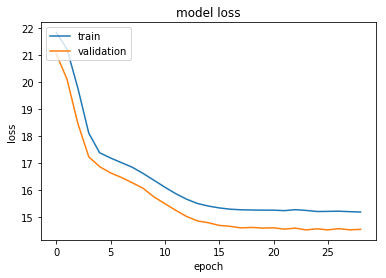

In [35]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()